In [1]:
#import xarray as xr

import numpy as np
import pandas as pd
from pathlib import Path

import os, sys
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
#import seaborn as sns
#sns.set_style('ticks')

from scipy import stats
from scipy.stats import percentileofscore

from datetime import datetime, timedelta
from vtools.functions.filter import cosine_lanczos
from vtools.data.vtime import days, hours, minutes



/global/home/users/jennaisrael/.conda/envs/schimpy/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Plot the station data from https://dwrbdodatastore.azurewebsites.net/repoui to pick 6 events from 2013, 2014, and 2020, and maybe 2 from 2015 with the barrier

In [2]:
#function comes from schimpy metricsplot.py script https://github.com/CADWRDeltaModeling/schimpy/blob/master/schimpy/metricsplot.py
def filter_timeseries(tss, cutoff_period=hours(40)):
    """ Filter time series

        Parameters
        ----------

        Returns
        -------
        list of vtools.data.timeseries.TimeSeries
            filtered time series
    """

    filtered = []
    ts=tss #try removing the loop for now
    if ts is None:
        filtered.append(None)
    else:
        #print(ts)
        ts_filtered = cosine_lanczos(ts, cutoff_period=cutoff_period)
        ts_filtered.filtered = 'cosine_lanczos'
        #ts_filtered.unit = ts.unit
        #filtered.append(ts_filtered)
    # for ts in tss:
    #     if ts is None:
    #         filtered.append(None)
    #     else:
    #         print(ts)
    #         ts_filtered = cosine_lanczos(ts, cutoff_period=cutoff_period)
    #         ts_filtered.filtered = 'cosine_lanczos'
    #         ts_filtered.unit = ts.unit
    #         filtered.append(ts_filtered)
    return ts_filtered

In [3]:
#load point reyes
colnames=['datetime','elev[m]']
dtformat = '%Y-%m-%dT%H:%M:%S'
pryc=pd.read_csv('/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/pryc1default_elev_screened_2021.csv', skiprows=73)
pryc['datetime']=pd.to_datetime(pryc['datetime'],format=dtformat)#.asfreq('15min')
pryc.set_index("datetime",inplace=True)
pryc=pryc.asfreq('6min')
#drop user_flag
pryc.drop(columns='user_flag',inplace=True)
#change value to elev[m]
pryc=pryc.rename(columns={"value": "elev[m]"})
pryc_filt=filter_timeseries(pryc)
pryc_filt

,elev[m]
datetime,
1995-12-31 16:00:00,NaN
1995-12-31 16:06:00,NaN
1995-12-31 16:12:00,NaN
1995-12-31 16:18:00,NaN
1995-12-31 16:24:00,NaN
...,...
2025-07-18 23:12:00,NaN
2025-07-18 23:18:00,NaN
2025-07-18 23:24:00,NaN


In [4]:
pryc.index.freq

<6 * Minutes>

In [5]:
# pryc.index

In [6]:
# pryc.index.year

In [7]:
#this is the easy way to index!!!!
pryc.loc['2013']

,elev[m]
datetime,
2013-01-01 00:00:00,1.221
2013-01-01 00:06:00,1.245
2013-01-01 00:12:00,1.263
2013-01-01 00:18:00,1.334
2013-01-01 00:24:00,1.362
...,...
2013-12-31 23:30:00,1.430
2013-12-31 23:36:00,1.392
2013-12-31 23:42:00,1.429


In [8]:
# #this did not work
# pryc.where(pryc.index.year==13)

In [9]:
#load jersey point, franks tract, holland cut salinity concatenate into one dataframe
dtformat = '%Y-%m-%dT%H:%M:%S'

jer=pd.read_csv('/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/jerdefault_ec_screened_2021.csv',skiprows=60)#.set_index("datetime")
jer=jer.rename(columns={"value": "jer_S[mS/cm]"})
jer['datetime']=pd.to_datetime(jer['datetime'],format=dtformat)
jer.set_index("datetime",inplace=True)
jer=jer.asfreq('15min')
jer_filt=filter_timeseries(jer)

frk=pd.read_csv('/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/frkdefault_ec_screened_2021.csv',skiprows=65)#.set_index('datetime')
frk=frk.rename(columns={"value": "frk_S[mS/cm]"})
frk['datetime']=pd.to_datetime(frk['datetime'],format=dtformat)
frk.set_index("datetime",inplace=True)
frk=frk.asfreq('15min')
frk_filt=filter_timeseries(frk)

hll=pd.read_csv('/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/hlldefault_ec_screened_2021.csv',skiprows=58)#.set_index('datetime')
hll=hll.rename(columns={"value": "hll_S[mS/cm]"})
hll['datetime']=pd.to_datetime(hll['datetime'],format=dtformat)
hll.set_index("datetime",inplace=True)
hll=hll.asfreq('15min')
hll_filt=filter_timeseries(hll)

# unit: microS/cm

In [10]:
sal=pd.concat([jer_filt,frk_filt,hll_filt])
sal.drop(columns='user_flag',inplace=True)
sal

,jer_S[mS/cm],frk_S[mS/cm],hll_S[mS/cm]
datetime,,,
1999-03-26 07:15:00,NaN,NaN,NaN
1999-03-26 07:30:00,NaN,NaN,NaN
1999-03-26 07:45:00,NaN,NaN,NaN
1999-03-26 08:00:00,NaN,NaN,NaN
1999-03-26 08:15:00,NaN,NaN,NaN
...,...,...,...
2025-07-18 22:00:00,NaN,NaN,NaN
2025-07-18 22:15:00,NaN,NaN,NaN
2025-07-18 22:30:00,NaN,NaN,NaN


In [11]:
# #tidally filter everything with the cosine lancoz filter
# pryc_filt=filter_timeseries(pryc)
# sal_filt=filter_timeseries(sal)
# sal_filt

In [12]:
#this is huge so trim before plotting
sal13=sal.loc['2013']
pryc13=pryc_filt.loc['2013']
sal13

,jer_S[mS/cm],frk_S[mS/cm],hll_S[mS/cm]
datetime,,,
2013-01-01 00:00:00,195.403436,NaN,NaN
2013-01-01 00:15:00,195.429810,NaN,NaN
2013-01-01 00:30:00,195.456247,NaN,NaN
2013-01-01 00:45:00,195.482731,NaN,NaN
2013-01-01 01:00:00,195.509247,NaN,NaN
...,...,...,...
2013-12-31 22:45:00,NaN,NaN,871.924253
2013-12-31 23:00:00,NaN,NaN,871.981854
2013-12-31 23:15:00,NaN,NaN,872.038988


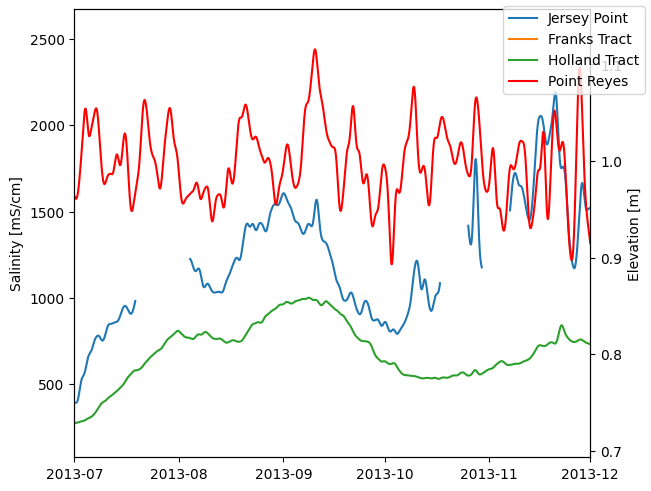

In [13]:
fig, ax = plt.subplots(layout="constrained",sharex=True)

ax.plot(sal13['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal13['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal13['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

ax2.plot(pryc13['elev[m]'], label='Point Reyes',color='r')
ax2.set_ylabel("Elevation [m]")

ax.set_xlim(datetime(2013,7,1),datetime(2013,12,1))
fig.legend()

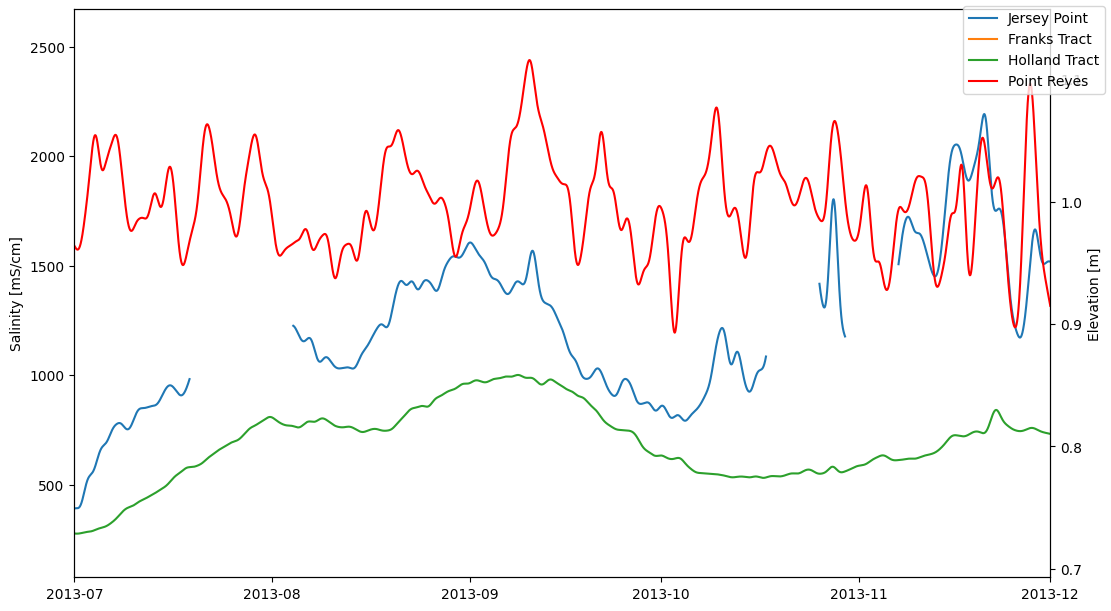

In [14]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal13['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal13['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal13['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

ax2.plot(pryc13['elev[m]'], label='Point Reyes',color='r')
ax2.set_ylabel("Elevation [m]")

ax.set_xlim(datetime(2013,7,1),datetime(2013,12,1))
fig.legend()

In [15]:
#read in the flux data so I can plot outflow
flux1=pd.read_csv('/global/scratch/users/jennaisrael/climate_data_processing/sl_regression/flux_from_bdschism_2025_06_05.csv',parse_dates=["datetime"],dtype=np.float32).set_index(["datetime"])#, names=['time','coyote','ccc_rock','ccc_old','swp','cvp','sjr','calaveras','east','american','sac','yolo_toedrain','yolo','northbay','napa','ccc_victoria'])
flux1


,coyote,ccc_rock,ccc_old,swp,cvp,sjr,calaveras,east,american,sac,yolo_toedrain,yolo,northbay,napa,ccc_victoria
datetime,,,,,,,,,,,,,,,
2006-10-01 00:00:00,-0.62,0.67,4.52,262.320007,120.830002,-94.860001,0.0,-25.780001,-72.769997,-330.570007,0.68,0.00,2.48,-0.01,0.0
2006-10-01 00:15:00,-0.62,0.67,4.52,263.239990,120.820000,-94.860001,0.0,-25.730000,-71.919998,-330.640015,-4.62,0.00,2.46,-0.01,0.0
2006-10-01 00:30:00,-0.62,0.66,4.52,263.410004,120.820000,-95.430000,0.0,-25.690001,-73.339996,-331.000000,-8.10,0.00,2.46,-0.01,0.0
2006-10-01 00:45:00,-0.62,0.66,4.52,263.390015,120.820000,-94.860001,0.0,-25.660000,-73.910004,-331.070007,-9.66,0.00,2.45,-0.01,0.0
2006-10-01 01:00:00,-0.62,0.66,4.52,263.350006,120.820000,-94.860001,0.0,-25.629999,-73.910004,-331.420013,-10.65,0.00,2.45,-0.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13 23:00:00,-0.84,2.46,4.18,1.680000,24.850000,-179.250000,0.0,-63.320000,-116.379997,-749.340027,0.06,-0.01,1.55,-1.68,0.0
2024-05-13 23:15:00,-0.84,2.44,4.22,1.700000,24.719999,-180.100006,0.0,-63.450001,-115.820000,-749.340027,0.06,-0.01,1.55,-1.65,0.0
2024-05-13 23:30:00,-0.84,2.41,4.27,1.720000,24.570000,-179.529999,0.0,-63.360001,-116.379997,-749.340027,0.06,-0.01,1.55,-1.65,0.0


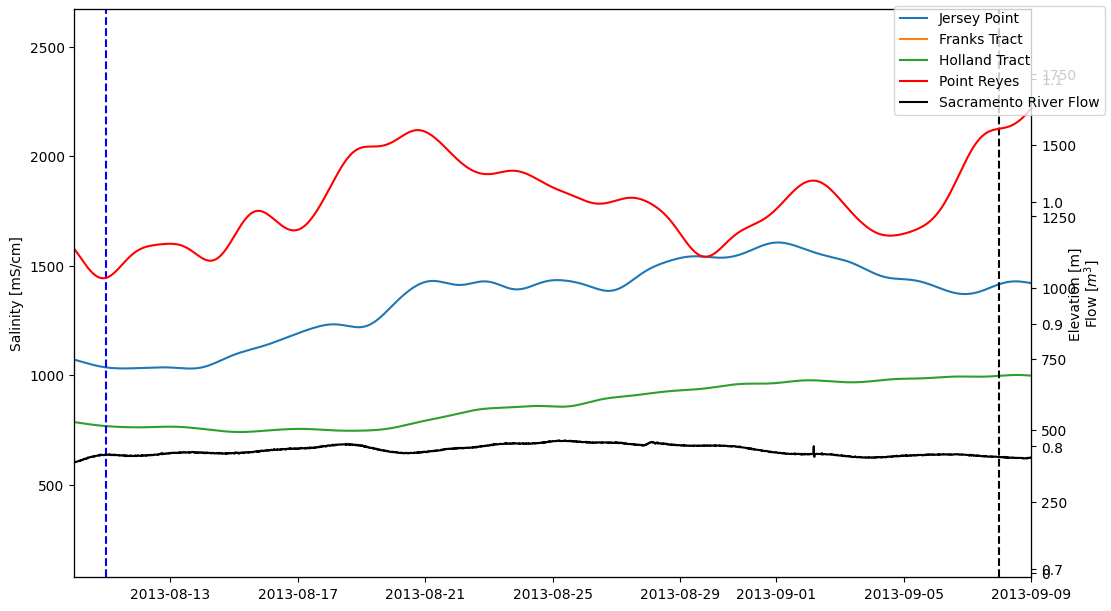

In [16]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal13['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal13['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal13['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

ax2.plot(pryc13['elev[m]'], label='Point Reyes',color='r')
ax2.set_ylabel("Elevation [m]")

ax3=ax.twinx()

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

#add vertical lines for start and end of subtidal pumping events
#start 1
ax.axvline(x = datetime(2013,7,18), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 1
ax.axvline(x = datetime(2013,8,1), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2013,8,11), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2013,9,8), color = 'k',linestyle='--')

# #Edit 08/12 add lines for peaks of events for looking at the maps
# #peak 2
# ax.axvline(x = datetime(2013,8,21), color = 'm',linestyle='--')

# #peak at Jersey Point
# ax.axvline(x = datetime(2013,9,1), color = 'c',linestyle='--')

ax.set_xlim(datetime(2013,8,10),datetime(2013,9,9))
#ax.set_xlim(datetime(2013,7,1),datetime(2014,1,1))
fig.legend()



#repeat for 2014 and 2020

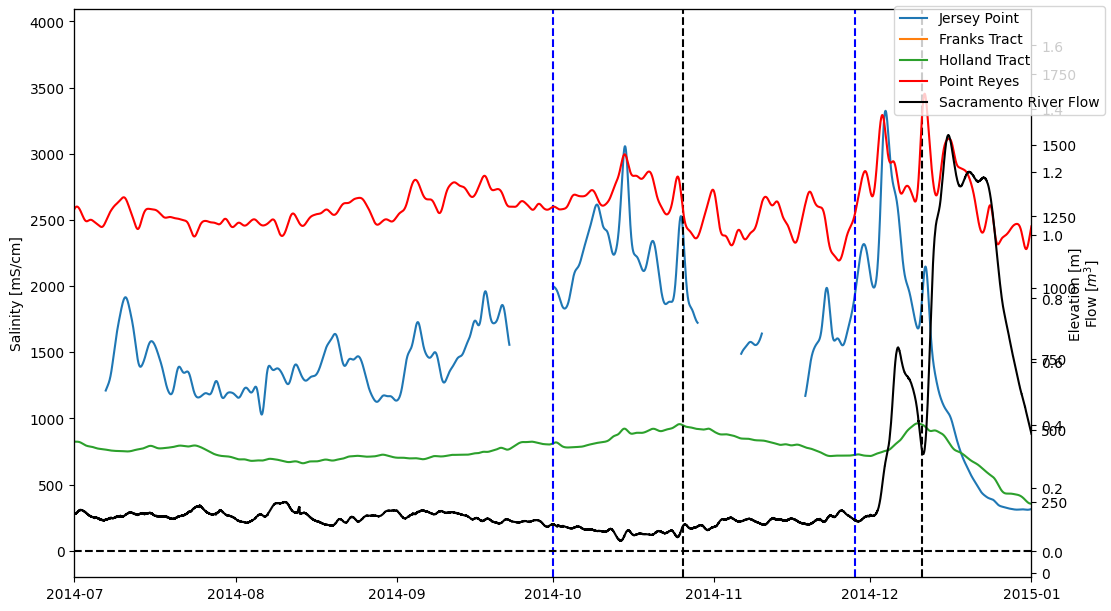

In [22]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
ax2.set_ylabel("Elevation [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

#add vertical lines for start and end of subtidal pumping events
#start 1
ax.axvline(x = datetime(2014,10,1), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 1
ax.axvline(x = datetime(2014,10,26), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2014,11,28), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2014,12,11), color = 'k',linestyle='--')

ax.set_xlim(datetime(2014,7,1),datetime(2015,1,1))
fig.legend()



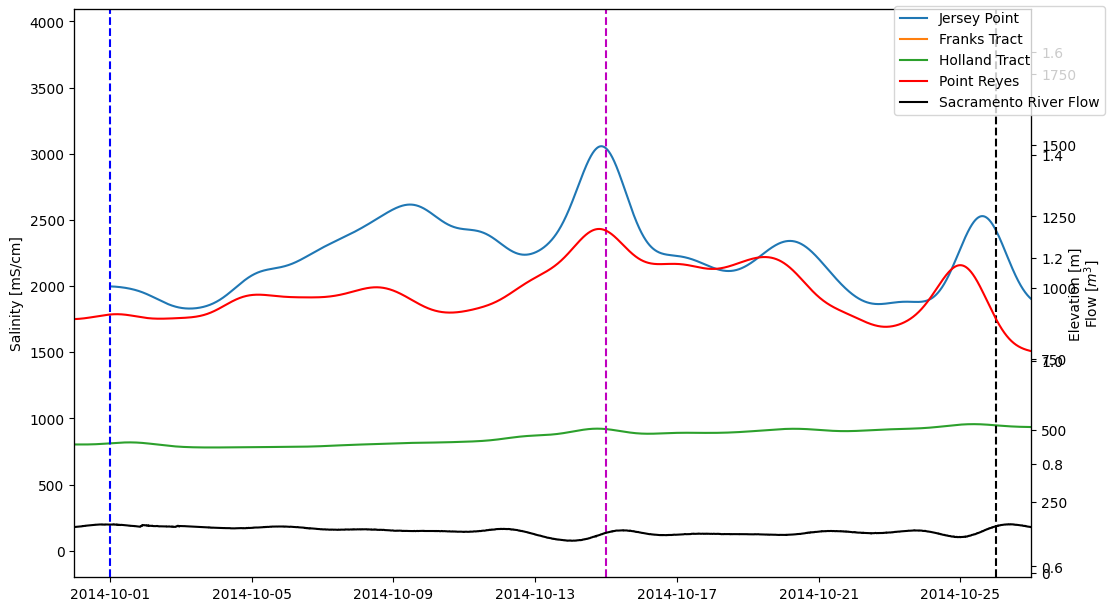

In [23]:
#add some more lines and limit the time range to identify events
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
ax2.set_ylabel("Elevation [m]")

ax3=ax.twinx()

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

#add vertical lines for start and end of subtidal pumping events
#start 1
ax.axvline(x = datetime(2014,10,1), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 1
ax.axvline(x = datetime(2014,10,26), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2014,11,28), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2014,12,11), color = 'k',linestyle='--')

#peak 1
ax.axvline(x = datetime(2014,10,15), color = 'm',linestyle='--')



ax.set_xlim(datetime(2014,9,30),datetime(2014,10,27))
fig.legend()


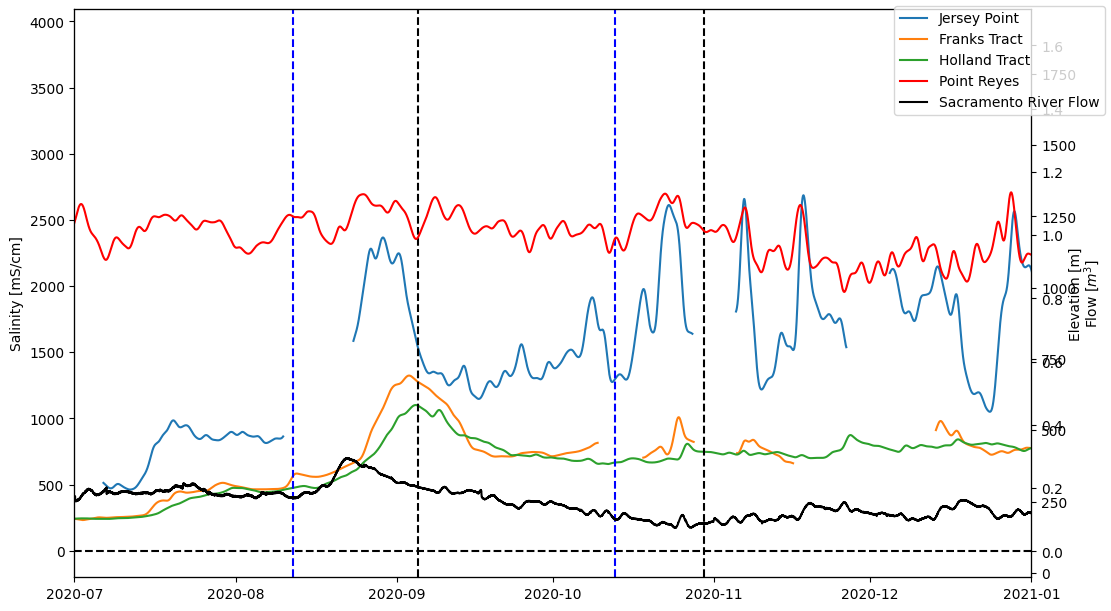

In [21]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
ax2.axhline(y=0, color = 'k',linestyle='--')
ax2.set_ylabel("Elevation [m]")

ax3=ax.twinx()

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

#add vertical lines for start and end of subtidal pumping events
#start 1
ax.axvline(x = datetime(2020,8,12), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 1
ax.axvline(x = datetime(2020,9,5), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2020,10,13), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2020,10,30), color = 'k',linestyle='--')

ax.set_xlim(datetime(2020,7,1),datetime(2021,1,1))
fig.legend()



In [20]:
jer

,jer_S[mS/cm],user_flag
datetime,,
1999-03-26 07:15:00,166.0,NaN
1999-03-26 07:30:00,166.0,NaN
1999-03-26 07:45:00,167.0,NaN
1999-03-26 08:00:00,170.0,NaN
1999-03-26 08:15:00,171.0,NaN
...,...,...
2025-07-18 22:00:00,496.0,NaN
2025-07-18 22:15:00,496.0,NaN
2025-07-18 22:30:00,509.0,NaN
